In [12]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib widget
plt.style.use('dark_background')

In [13]:
# Genera puntos homogéneamente sobre una esfera, entrega en coordenadas (phi, theta)
def rand_sphere(npt):
    phi=np.random.uniform(-np.pi,np.pi,npt)
    theta=np.arccos(np.random.uniform(-1,1,npt))-np.pi/2
    pos = np.vstack((phi,theta)).T
    return pos

In [14]:
# Transforma coordenadas (phi, theta) a (x, y) para graficar en proyección mollweide
def ang_to_mollweide(phi,theta):   
    x = phi / np.pi * np.sqrt(1 - (theta / (np.pi / 2)) ** 2)
    y = theta / np.pi
    return x,y

# Grafica los puntos en proyección mollweide
def mollweide_plot(pos):
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111)
    ax.axis("equal")
    ax.axis(False)

    pos_moll=ang_to_mollweide(pos.T[0],pos.T[1])
    ax.plot(pos_moll[0],pos_moll[1],".",color="white",markersize=1)

    x=np.linspace(-1,1,1001)
    contour=np.sqrt(1-x**2)/2
    ax.plot(x,contour,x,-contour,color="white",linewidth=0.5)

    plt.show()

In [15]:
# Transforma coordenadas (phi,theta) a (x,y,z) para graficar en esfera 3D
def ang_to_xyz(phi,theta):
    x = np.sin(theta+np.pi/2)*np.cos(phi)
    y = np.sin(theta+np.pi/2)*np.sin(phi)
    z = np.cos(theta+np.pi/2)
    return x,y,z

# Grafica los puntos en esfera 3D
def graf_3D(pos):
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111, projection='3d')

    x,y,z = ang_to_xyz(pos.T[0],pos.T[1])

    ax.scatter(x, y, z, marker=".")

    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = 0.99*np.cos(u)*np.sin(v)
    y = 0.99*np.sin(u)*np.sin(v)
    z = 0.99*np.cos(v)
    ax.plot_wireframe(x, y, z, color="w", alpha=0.2)

    ax.axis(False)
    ax.set_box_aspect([1,1,1])

    plt.show()

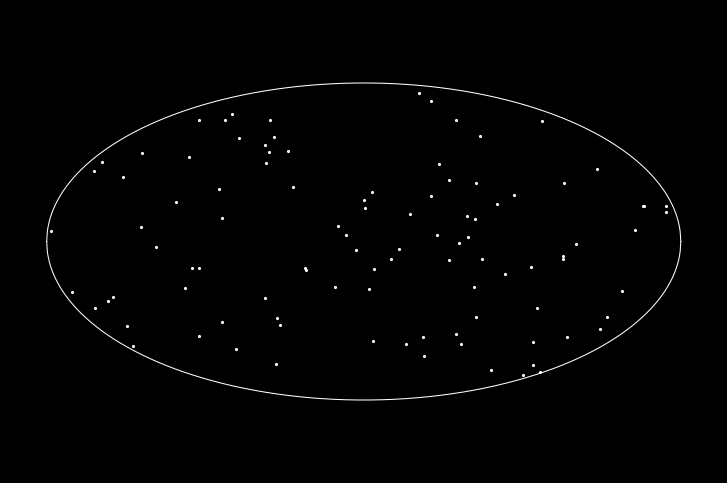

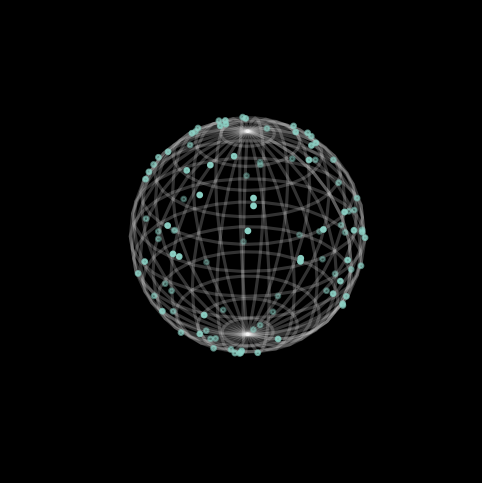

In [16]:
# generamos 100 puntos
puntos = rand_sphere(100)

#graficamos en proyección mollweide y 3D
mollweide_plot(puntos)
graf_3D(puntos)


